# Data Visualization

## Reference:
 - 1. Book: McKinney, p251
 - 2. Book: Nelli, p231 [3D Plots]
 - 3. [Seaborn Tutorial](http://seaborn.pydata.org/tutorial.html)
 - 4. [Pareto Plot](https://stackoverflow.com/questions/53577630/how-to-make-pareto-chart-in-python)
 - 5. [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random

pd.plotting.register_matplotlib_converters()
%matplotlib inline
plt.style.use('seaborn-whitegrid')
pd.set_option('display.max_columns', 500)
warnings.filterwarnings("ignore")

In [2]:
mydata = pd.read_csv('insurance.csv')
mydata.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


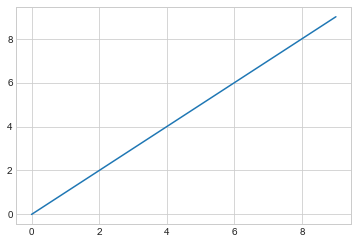

In [3]:
data = np.arange(10)
plt.plot(data)

Plots in matplotlib reside within a <code>Figure</code> object. You can create a new figure with <code>plt.figure</code>:

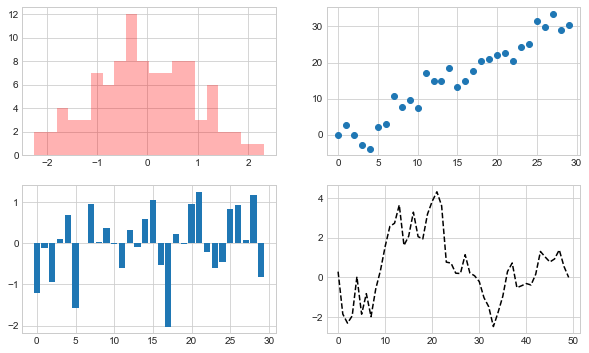

In [4]:
fig = plt.figure(figsize = (10, 6))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)


# _ = ax1.hist(np.random.randn(100), bins=20, color='r', alpha=0.3)
ax1.hist(np.random.randn(100), bins=20, color='r', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
ax3.bar(np.arange(30), np.random.randn(30))
plt.plot(np.random.randn(50).cumsum(), 'k--')

In [5]:
pd.crosstab(mydata['sex'],mydata['smoker'], margins = True )

smoker,no,yes,All
sex,,,
female,547,115,662
male,517,159,676
All,1064,274,1338


### Reference:
1. [Seaborn Countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html)

In [6]:
# Quickly check seaborn version
sns.__version__

'0.9.0'

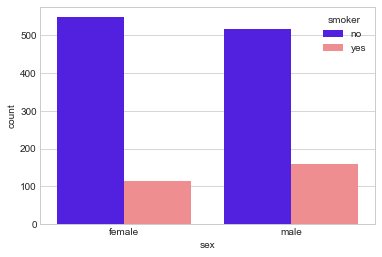

In [7]:
sns.countplot(x = 'sex', hue = 'smoker', hue_order = ['no', 'yes'], palette = 'gnuplot2', data = mydata)

In [8]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Charges Desciption:
Charges(min) : 1121.8739
Q1     : 4740.28715
Q2     : 9382.033
Q3     : 16639.912515
Charges(max) : 63770.42801


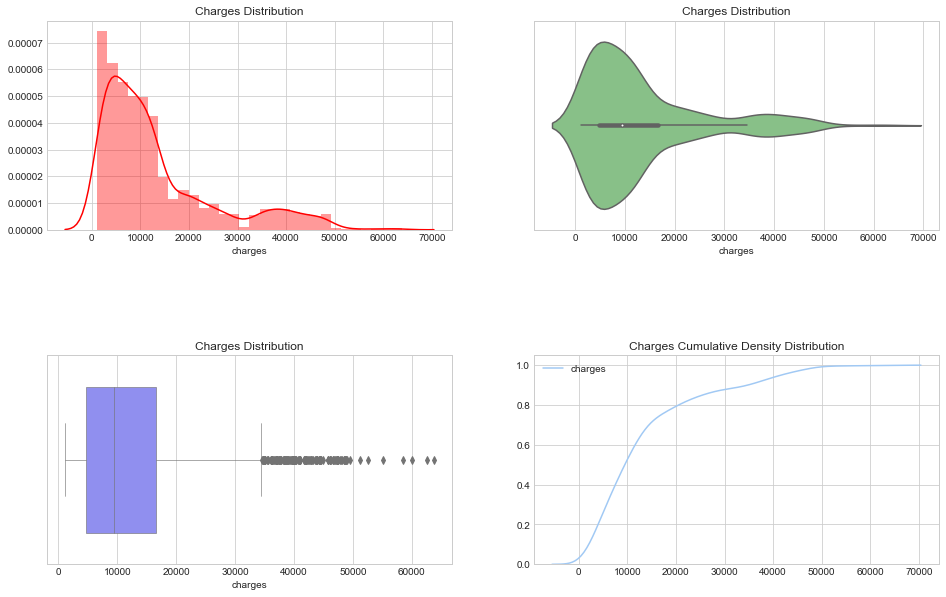

In [9]:
data = mydata
def summary(x):
    x_min = data[x].min()
    x_max = data[x].max()
    Q1 = data[x].quantile(0.25)
    Q2 = data[x].quantile(0.50)
    Q3 = data[x].quantile(0.75)
    print(f'{x.capitalize()} Desciption:\n'
          f'{x.capitalize()}(min) : {x_min}\n'
          f'Q1     : {Q1}\n'
          f'Q2     : {Q2}\n'
          f'Q3     : {Q3}\n'
          f'{x.capitalize()}(max) : {x_max}')

    fig = plt.figure(figsize=(16, 10))
    plt.subplots_adjust(hspace = 0.6)
    sns.set_palette('pastel')
    
    plt.subplot(221)
    ax1 = sns.distplot(data[x], color = 'r')
    plt.title(f'{x.capitalize()} Distribution')
    
    plt.subplot(222)
    ax2 = sns.violinplot(x = data[x], palette = 'Accent', split = True)
    plt.title(f'{x.capitalize()} Distribution')
    
    plt.subplot(223)
    ax2 = sns.boxplot(x=data[x], palette = 'cool', width=0.7, linewidth=0.6)
    plt.title(f'{x.capitalize()} Distribution')
    
    plt.subplot(224)
    ax3 = sns.kdeplot(data[x], cumulative=True)
    plt.title(f'{x.capitalize()} Cumulative Density Distribution')
    
    plt.show()
    
summary('charges')

Bmi Desciption:
Bmi(min) : 15.96
Q1     : 26.29625
Q2     : 30.4
Q3     : 34.69375
Bmi(max) : 53.13


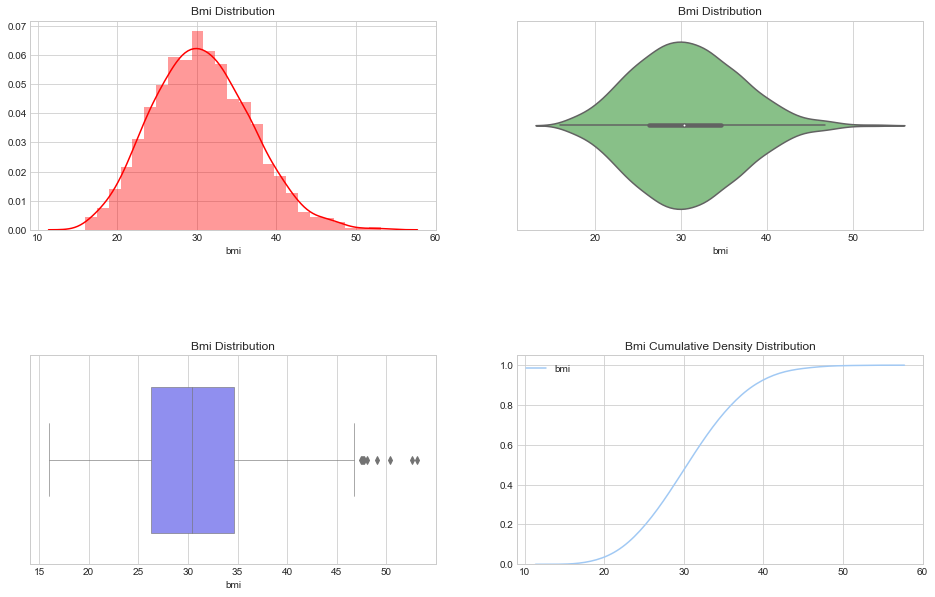

In [10]:
summary('bmi')

For line plots, you will notice that subsequent points are linearly interpolated bydefault. This can be altered with the <code>drawstyle</code> option:

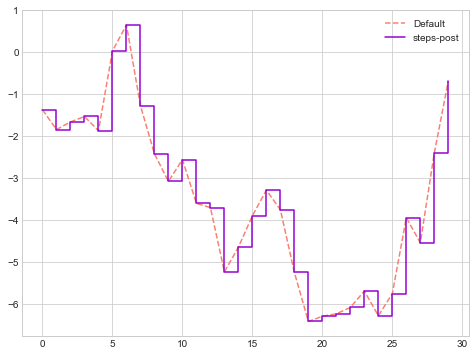

In [11]:
data = np.random.randn(30).cumsum()
fig = plt.figure(figsize=(8, 6))
plt.plot(data, 'k--', label='Default', color = 'salmon')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post', color = 'darkviolet')
plt.legend(loc='best')

## Annotating Plots:
Reference: 
 - 1. [MPL Annotations](https://matplotlib.org/tutorials/text/annotations.html)
 - 2. [Annotated Boxplots](https://stackoverflow.com/questions/40813813/have-boxplot-want-to-label-median-and-whiskers-with-values)
 - 3. [pd.df.boxplot()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html)
 - 4. [plt.boxplot()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html#matplotlib.pyplot.boxplot)
 - 5. [plt.boxplot() Demo](https://matplotlib.org/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py)
 - 6. [Seaborn boxplot annotation](https://stackoverflow.com/questions/38649501/labeling-boxplot-in-seaborn-with-median-value)

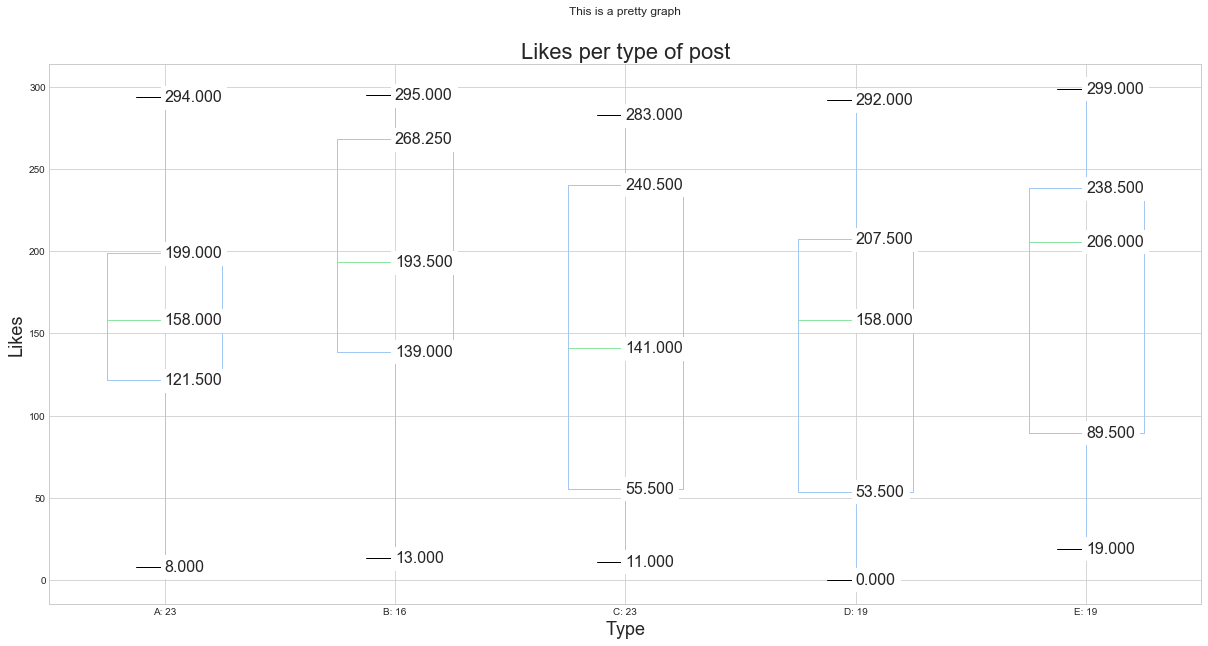

In [12]:
import string

def get_x_tick_labels(df, grouped_by):
    tmp = df.groupby([grouped_by]).size()
    return ["{0}: {1}".format(k,v) for k, v in tmp.to_dict().items()]

def series_values_as_dict(series_object):
    tmp = series_object.to_dict().values()
    return [y for y in tmp][0]

def generate_dataframe():
    # Create a pandas dataframe...
    _likes = [random.randint(0,300) for _ in range(100)]
    _type = [random.choice(string.ascii_uppercase[:5]) for _ in range(100)]
    _shares = [random.randint(0,100) for _ in range(100)]
    return pd.DataFrame(
        {'Likes': _likes,
         'Type': _type,
         'shares': _shares
        })

def add_values(bp, ax):
    """ This actually adds the numbers to the various points of the boxplots"""
    for element in ['whiskers', 'medians', 'caps']:
        for line in bp[element]:
            # Get the position of the element. y is the label you want
            (x_l, y),(x_r, _) = line.get_xydata()
            # Make sure datapoints exist 
            # (I've been working with intervals, should not be problem for this case)
            if not np.isnan(y): 
                x_line_center = x_l + (x_r - x_l)/2
                y_line_center = y  # Since it's a line and it's horisontal
                # overlay the value:  on the line, from center to right
                ax.text(x_line_center, y_line_center, # Position
                        '%.3f' % y, # Value (3f = 3 decimal float)
                        verticalalignment='center', # Centered vertically with line 
                        fontsize=16, backgroundcolor="white")

posts_by_type = generate_dataframe()


fig, axes = plt.subplots(1, figsize=(20, 10))

bp_series = posts_by_type.boxplot(column='Likes', by='Type', 
                                  grid=True, figsize=(25, 10), 
                                  ax=axes, return_type='dict')
# This should return a dict, but gives me a Series object, soo...
bp_dict = series_values_as_dict(bp_series)
#Now add the values
add_values(bp_dict, axes)
# Set a label on X-axis for each boxplot
labels = get_x_tick_labels(posts_by_type, 'Type')
plt.xticks(range(1, len(labels) + 1), labels)
# Change some other texts on the graphs?
plt.title('Likes per type of post', fontsize=22)
plt.xlabel('Type', fontsize=18)
plt.ylabel('Likes', fontsize=18)
plt.suptitle('This is a pretty graph')
plt.show()

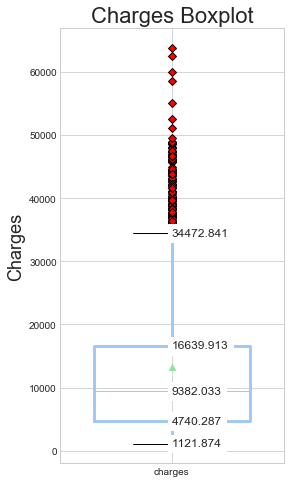

In [13]:
def add_values(bp, ax):
    """ This actually adds the numbers to the various points of the boxplots"""
    for element in ['whiskers', 'medians', 'caps']:
        for line in bp[element]:
            # Get the position of the element. y is the label you want
            (x_l, y),(x_r, _) = line.get_xydata()
            # Make sure datapoints exist 
            # (I've been working with intervals, should not be problem for this case)
            if not np.isnan(y): 
                x_line_center = x_l + (x_r - x_l)/2
                y_line_center = y  # Since it's a line and it's horisontal
                # overlay the value:  on the line, from center to right
                ax.text(x_line_center, y_line_center, # Position
                        '%.3f' % y, # Value (3f = 3 decimal float)
                        verticalalignment='center', # Centered vertically with line 
                        fontsize=12, backgroundcolor="white")

fig, axes = plt.subplots(1, figsize=(4, 8))

red_diamond = dict(markerfacecolor='r', marker='D')

bp_dict = mydata.boxplot(column = 'charges', 
                         grid=True, 
                         figsize=(4, 8), 
                         ax=axes, 
                         vert = True, 
                         notch=False, 
                         widths = 0.7, 
                         showmeans = True, 
                         whis = 1.5,
                         flierprops = red_diamond,
                         boxprops= dict(linewidth=3.0, color='black'),
                         whiskerprops=dict(linewidth=3.0, color='black'),
                         return_type = 'dict')

add_values(bp_dict, axes)

plt.title('Charges Boxplot', fontsize=22)
plt.ylabel('Charges', fontsize=18)
plt.show()

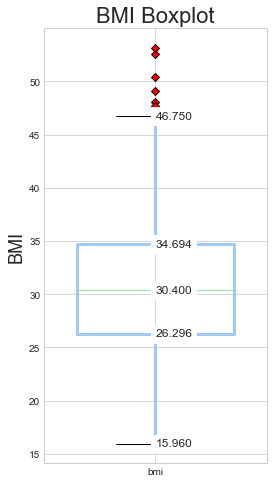

In [14]:
def add_values(bp, ax):
    """ This actually adds the numbers to the various points of the boxplots"""
    for element in ['whiskers', 'medians', 'caps']:
        for line in bp[element]:
            # Get the position of the element. y is the label you want
            (x_l, y),(x_r, _) = line.get_xydata()
            # Make sure datapoints exist 
            # (I've been working with intervals, should not be problem for this case)
            if not np.isnan(y): 
                x_line_center = x_l + (x_r - x_l)/2
                y_line_center = y  # Since it's a line and it's horisontal
                # overlay the value:  on the line, from center to right
                ax.text(x_line_center, y_line_center, # Position
                        '%.3f' % y, # Value (3f = 3 decimal float)
                        verticalalignment='center', # Centered vertically with line 
                        fontsize=12, backgroundcolor="white")

fig, axes = plt.subplots(1, figsize=(4, 8))

red_diamond = dict(markerfacecolor='r', marker='D')

bp_dict = mydata.boxplot(column = 'bmi', 
                         grid=True, 
                         figsize=(4, 8), 
                         ax=axes, 
                         vert = True, 
                         notch=False, 
                         widths = 0.7, 
                         showmeans = True, 
                         whis = 1.5,
                         flierprops = red_diamond,
                         boxprops= dict(linewidth=3.0, color='black'),
                         whiskerprops=dict(linewidth=3.0, color='black'),
                         return_type = 'dict')

add_values(bp_dict, axes)

plt.title('BMI Boxplot', fontsize=22)
plt.ylabel('BMI', fontsize=18)
plt.show()

In [51]:
def summary_stats(x = 'bmi'):
    def add_values(bp, ax):
        """ This actually adds the numbers to the various points of the boxplots"""
        for element in ['whiskers', 'medians', 'caps']:
            for line in bp[element]:
                # Get the position of the element. y is the label you want
                (x_l, y),(x_r, _) = line.get_xydata()
                # Make sure datapoints exist 
                # (I've been working with intervals, should not be problem for this case)
                if not np.isnan(y): 
                    x_line_center = x_l + (x_r - x_l)/2
                    y_line_center = y  # Since it's a line and it's horisontal
                    # overlay the value:  on the line, from center to right
                    ax.text(x_line_center, y_line_center, # Position
                            '%.3f' % y, # Value (3f = 3 decimal float)
                            verticalalignment='center', # Centered vertically with line 
                            fontsize=12, backgroundcolor="white")

    fig, axes = plt.subplots(1, figsize=(4, 8))

    red_diamond = dict(markerfacecolor='r', marker='D')

    bp_dict = mydata.boxplot(column = x, 
                             grid=True, 
                             figsize=(4, 8), 
                             ax=axes, 
                             vert = True, 
                             notch=False, 
                             widths = 0.7, 
                             showmeans = True, 
                             whis = 1.5,
                             flierprops = red_diamond,
                             boxprops= dict(linewidth=3.0, color='black'),
                             whiskerprops=dict(linewidth=3.0, color='black'),
                             return_type = 'dict')

    add_values(bp_dict, axes)

    plt.title(f'{x.upper()} Boxplot', fontsize=22)
    plt.ylabel(f'{x.upper()}', fontsize=18)
    plt.show()

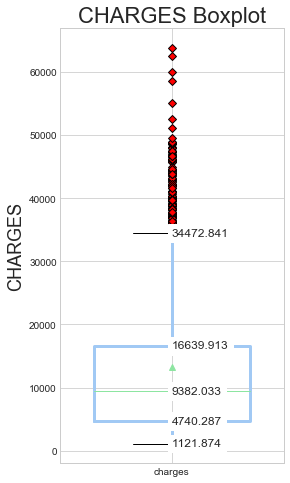

In [52]:
summary_stats('charges')

In [17]:
mydata.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### <font color = 'red'>Q1: Charges of Smoner / Non - Smoker</font>

In [18]:
pd.pivot_table(mydata, index = ['smoker']).round(2)

,age,bmi,charges,children
smoker,,,,
no,39.39,30.65,8434.27,1.09
yes,38.51,30.71,32050.23,1.11


In [19]:
mydata.groupby(['smoker', 'sex']).mean().round(2)

age    bmi  children   charges
smoker sex                                     
no     female  39.69  30.54      1.09   8762.30
       male    39.06  30.77      1.09   8087.20
yes    female  38.61  29.61      1.01  30679.00
       male    38.45  31.50      1.19  33042.01

In [20]:
cat1 = mydata[mydata['smoker']=='no']
cat2 = mydata[mydata['smoker']=='yes']
cat1.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


133207311.20634921


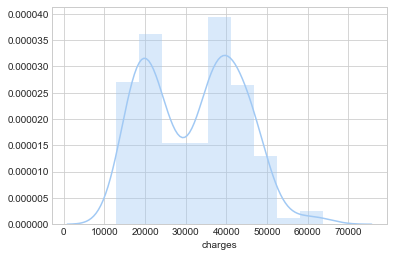

In [21]:
var_smoker = np.var(cat2['charges'], ddof = 1)
print(var_smoker)
sns.distplot(cat2['charges'])

var_non_smoker


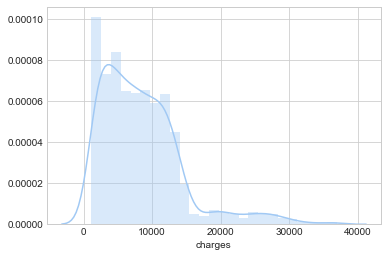

In [22]:
var_non_smoker = np.var(cat1['charges'], ddof = 1)
print('var_non_smoker')
sns.distplot(cat1['charges'])

### References:
 - 1. [Ref 1](https://stackoverflow.com/questions/13404468/t-test-in-pandas)
 - 2. [Ref 2](https://stats.stackexchange.com/questions/305/when-conducting-a-t-test-why-would-one-prefer-to-assume-or-test-for-equal-vari)
 - 3. [Ref 3](https://stackoverflow.com/questions/41204400/what-is-the-difference-between-numpy-var-and-statistics-variance-in-python)

In [23]:
from scipy.stats import ttest_ind
ttest_ind(cat1['charges'], cat2['charges'], equal_var=False)

Ttest_indResult(statistic=-32.751887766341824, pvalue=5.88946444671698e-103)

In [24]:
5.88946444671698e-103 > 0.05

False

### <font color = 'red'>Q2: BMI of males / females</font>

In [25]:
cat1 = mydata[mydata['sex']=='male']
cat2 = mydata[mydata['sex']=='female']
cat1.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
8,37,male,29.830,2,no,northeast,6406.41070


In [26]:
cat2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692


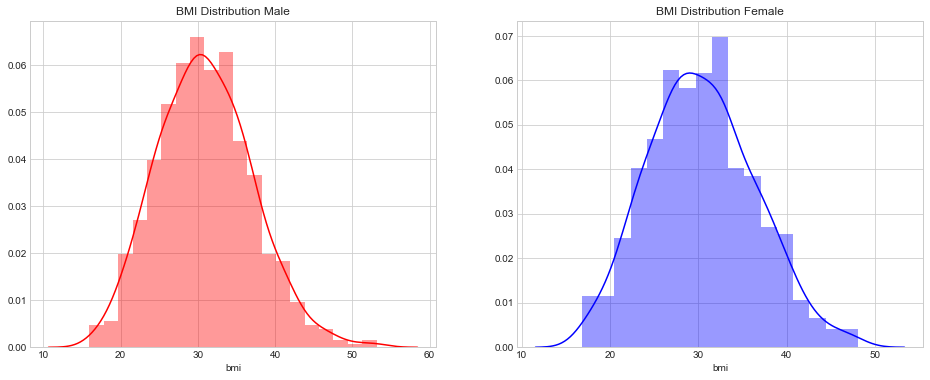

In [27]:
fig = plt.figure(figsize=(16, 6))
plt.subplots_adjust(hspace = 0.5)
sns.set_palette('pastel')

plt.subplot(121)
ax1 = sns.distplot(cat1['bmi'], color = 'r')
plt.title(f'BMI Distribution Male')

plt.subplot(122)
ax1 = sns.distplot(cat2['bmi'], color = 'b')
plt.title(f'BMI Distribution Female')

plt.show()

### Reference:
1. [Plotting Multiple Distributions](https://stackoverflow.com/questions/46045750/python-distplot-with-multiple-distributions)

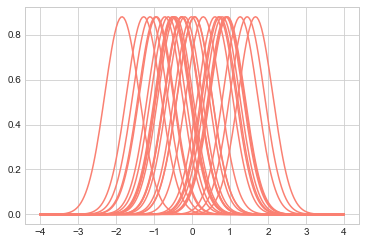

In [28]:
from scipy import stats
x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="salmon")

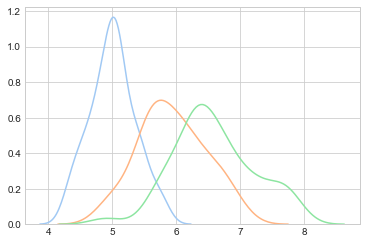

In [29]:
from sklearn.datasets import load_iris
iris = load_iris()
iris = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                    columns=iris['feature_names'] + ['target'])

# Sort the dataframe by target
target_0 = iris.loc[iris['target'] == 0]
target_1 = iris.loc[iris['target'] == 1]
target_2 = iris.loc[iris['target'] == 2]

sns.distplot(target_0[['sepal length (cm)']], hist=False)
sns.distplot(target_1[['sepal length (cm)']], hist=False)
sns.distplot(target_2[['sepal length (cm)']], hist=False)

plt.show()

In [30]:
var_bmi_male = np.var(cat1['bmi'], ddof = 1)
print(var_bmi_male)

37.70493727081969


In [31]:
var_bmi_female = np.var(cat2['bmi'], ddof = 1)
print(var_bmi_female)

36.554395153365576


In [32]:
ttest_ind(cat1['bmi'], cat2['bmi'], equal_var=False)

Ttest_indResult(statistic=1.697027933124022, pvalue=0.08992430667834876)

### <font color = 'red'>Q3: Proportion of Smokers in Male and Female</font>
* 'sex' and 'smoker' are two categorical variables
* We want to see if the proportion of smokers in the female population is significantly less than it is in the male population

#### Ho = The proportions are equal
#### Ha = The two proportions are not equal

In [33]:
df = mydata
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


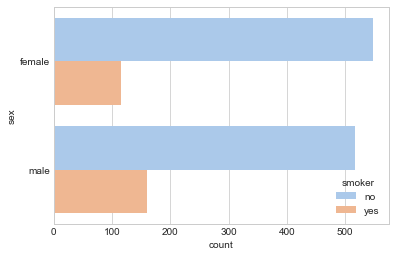

In [34]:
sns.countplot(y = 'sex', hue = 'smoker', hue_order = ['no', 'yes'], data = mydata)

In [35]:
female_smokers = df[df['sex'] == 'female'].smoker.value_counts()[1]  # number of female smokers
male_smokers = df[df['sex'] == 'male'].smoker.value_counts()[1] # number of male smokers
n_females = df.sex.value_counts()[1] # number of females in the data
n_males = df.sex.value_counts()[0] #number of males in the data

print([female_smokers, male_smokers] , [n_females, n_males])
print(f' Proportion of smokers in females, males = {round(115/662,2)}%, {round(159/676,2)}% respectively')

[115, 159] [662, 676]
 Proportion of smokers in females, males = 0.17%, 0.24% respectively


The proportions are different but are they statistically significant?

In [36]:
from statsmodels.stats.proportion import proportions_ztest

stat, pval = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])

if pval < 0.05:
    print(f'With a p-value of {round(pval,4)} the difference is significant. aka |We reject the null|')
else:
    print(f'With a p-value of {round(pval,4)} the difference is not significant. aka |We fail to reject the null|')

With a p-value of 0.0053 the difference is significant. aka |We reject the null|


### <font color = 'red'>Q4: Dist of BMI across Women with 0, 1, 2 or 3 Children</font>

In [37]:
mydata.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [38]:
df2 = mydata[mydata['sex'] == 'female']
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692


In [39]:
len(df2)

662

In [40]:
female = df2[['bmi']].groupby(df['children']).count()
print(type(female))
female

<class 'pandas.core.frame.DataFrame'>


,bmi
children,
0,289
1,158
2,119
3,77
4,11
5,8


In [41]:
female.sum()

bmi    662
dtype: int64

In [42]:
df3 = df2[df2['children'] <= 2 ]
df3.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
9,60,female,25.84,0,no,northwest,28923.13692
11,62,female,26.29,0,yes,southeast,27808.72510


In [43]:
female = df3[['bmi']].groupby(df['children']).count()
print(type(female))
female

<class 'pandas.core.frame.DataFrame'>


,bmi
children,
0,289
1,158
2,119


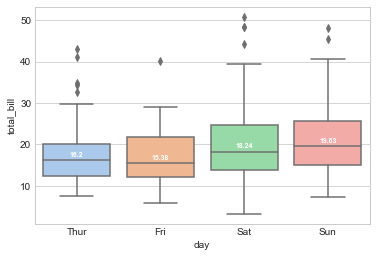

In [44]:
tips = sns.load_dataset("tips")
box_plot = sns.boxplot(x="day",y="total_bill",data=tips)

medians = tips.groupby(['day'])['total_bill'].median()
vertical_offset = tips['total_bill'].median() * 0.05 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

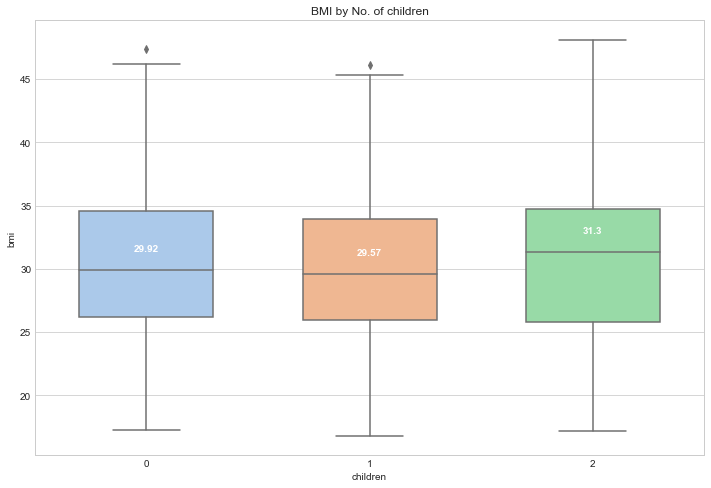

In [45]:
fig = plt.figure(figsize=(12, 8))
box_plot = sns.boxplot(x = "children", y = "bmi", data = df3, width = 0.6)

medians = df3.groupby(['children'])['bmi'].median().round(2)
vertical_offset = df3['bmi'].median() * 0.05 # offset from median for display

medians
for xtick in box_plot.get_xticks():
    box_plot.text(xtick, medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',color='w',weight='semibold')


plt.title('BMI by No. of children')
plt.show()

#### The boxplots show almost dissimilar shapes, location and spreads and there are some outlier values.

### Step 1: State the null and alternative hypothesis:

* $H_0$: $\mu1$ = $\mu2$ = $\mu3$
* $H_A$: At least one $\mu$ differs 

Here $\mu1$, $\mu2$ and $\mu3$ are the mean pressure applied to the driver's head during crash test by Compact car, Midsize car and Full size car respectively.

### Step 2: Decide the significance level

Here we select α = 0.05

### Step 3: Identify the test statistic

Here we have 5 groups. Analysis of variance can determine whether the means of three or more groups are different. ANOVA uses F-tests to statistically test the equality of means.

### Step 4: Calculate p value using ANOVA table
* statsmodels.formula.api.ols creates a model from a formula and dataframe
* statsmodels.api.sm.stats.anova_lm gives an Anova table for one or more fitted linear models

In [46]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('bmi ~ children', data = df3).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq     df         F   PR(>F)
children      2.512982    1.0  0.068411  0.79376
Residual  20717.738725  564.0       NaN      NaN


### <font color = 'red'>Conclusion: We fail to reject the null hypothesis that for BMI for 3 groups of women having no, one or two children respectively, atleast one mean BMI is significantly different from the others.</font>

### Determine which mean(s) is / are different

* An ANOVA test will test that at least one mean is different. 
* We have falied to reject the null hypothesis but do not know which mean(s) is / are different.
We use Tukey-krammer HSD test to detect which mean(s) is / are different.

In [47]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(df3['bmi'], df3['children']))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.3089 0.8494 -1.7186 1.1008  False
     0      2   0.2883 0.8942 -1.2636 1.8402  False
     1      2   0.5971 0.6797 -1.1323 2.3265  False
---------------------------------------------------
